In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

In [2]:
#Importing  dataset
gdrive_file_id = '1wURQ3c253wTKx_rIBwZCD_BTYnRdBcLy'
df = pd.read_csv(f'https://docs.google.com/uc?id={gdrive_file_id}&export=download', encoding='ISO-8859-1')

In [3]:
#Exploring the dataset
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [4]:
df.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11
2990,2991,Bitcoin,BTC,2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11


In [5]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [6]:
df.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=2991, step=1)

In [8]:
df.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df[df.duplicated()]

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap


In [11]:
market_cap = df[['Name', 'Marketcap']]

In [12]:
market_cap.count()

Name         2991
Marketcap    2991
dtype: int64

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
yearly_data = df.groupby(pd.Grouper(key='Date', freq='Y'))['Close'].mean()

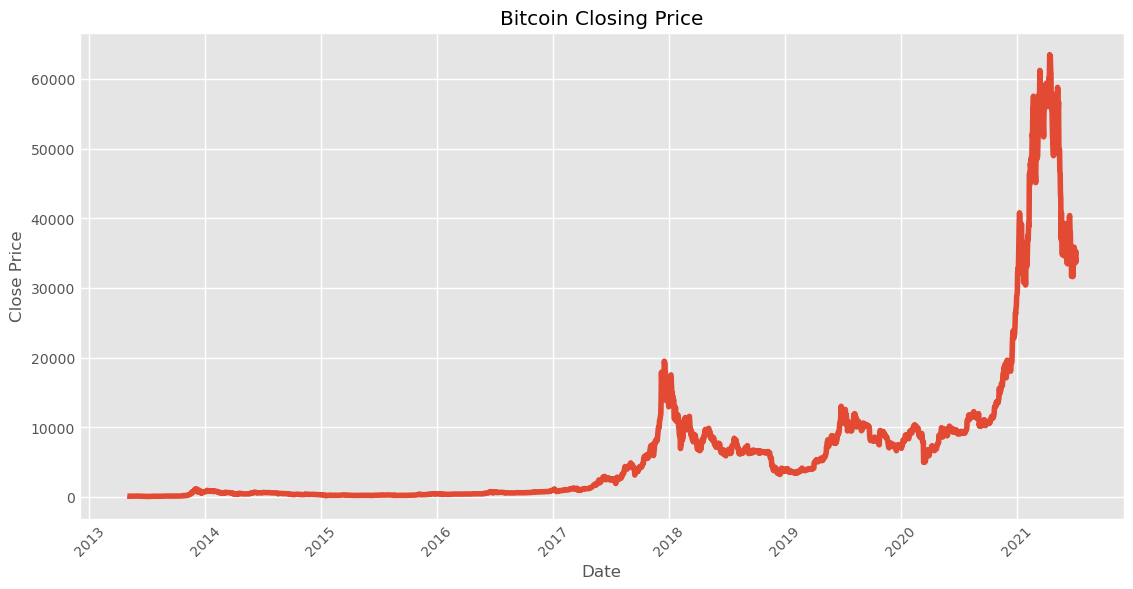

In [39]:
#Line plot
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])
ax.set(xlabel='Date', ylabel='Close Price', title='Bitcoin Closing Price')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.show()

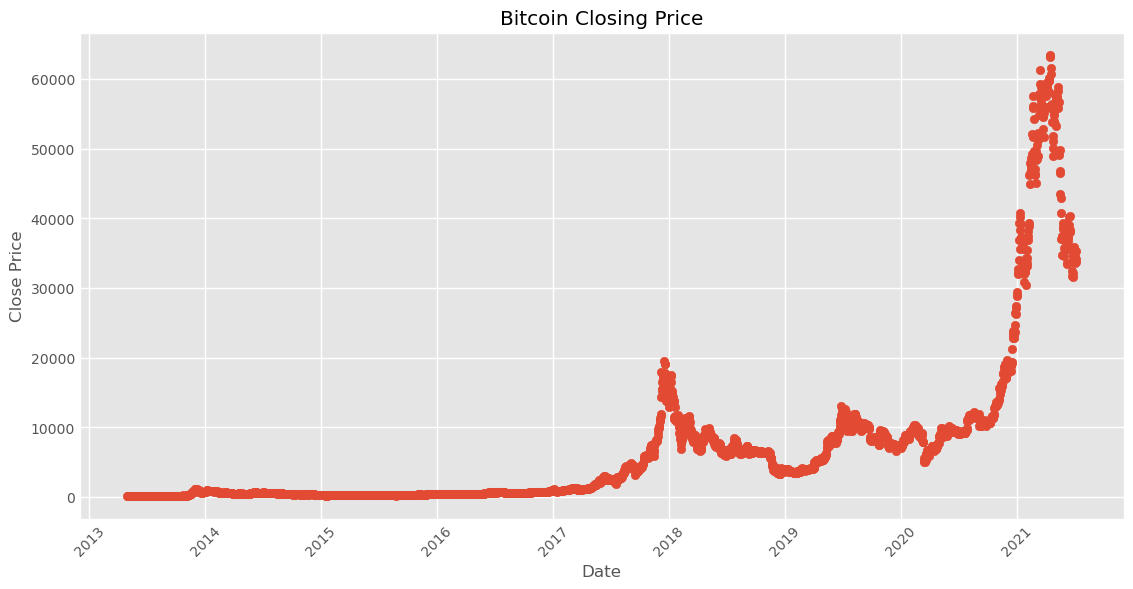

In [38]:
#Scatter plot
fig, ax = plt.subplots()
ax.scatter(df['Date'], df['Close'])
ax.set(xlabel='Date', ylabel='Close Price', title='Bitcoin Closing Price')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.show()

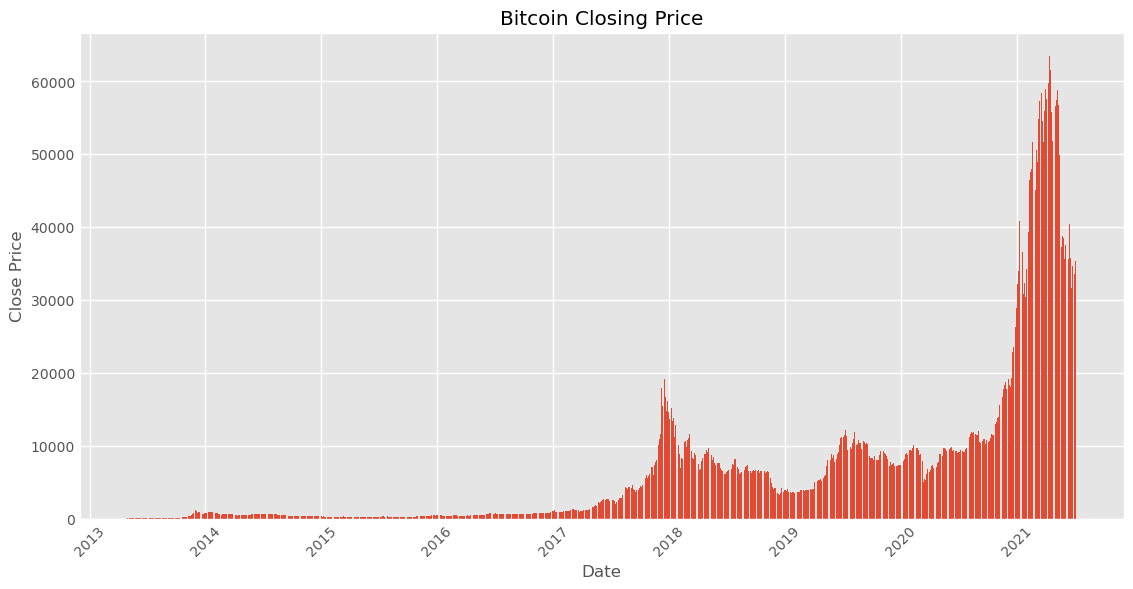

In [41]:
# Bar plot
fig, ax = plt.subplots()
ax.bar(df['Date'], df['Close'])
ax.set(xlabel='Date', ylabel='Close Price', title='Bitcoin Closing Price')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.show()

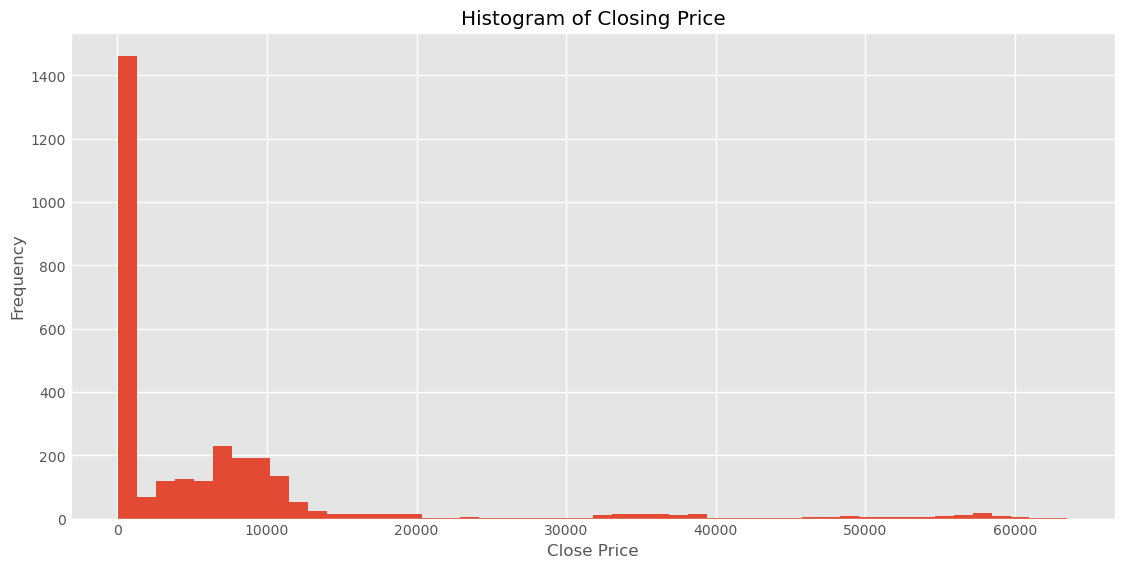

In [42]:
# Histogram
plt.hist(df['Close'], bins=50)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Histogram of Closing Price')
plt.show()

C:\Users\islam\AppData\Local\Temp\ipykernel_26080\1083877507.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


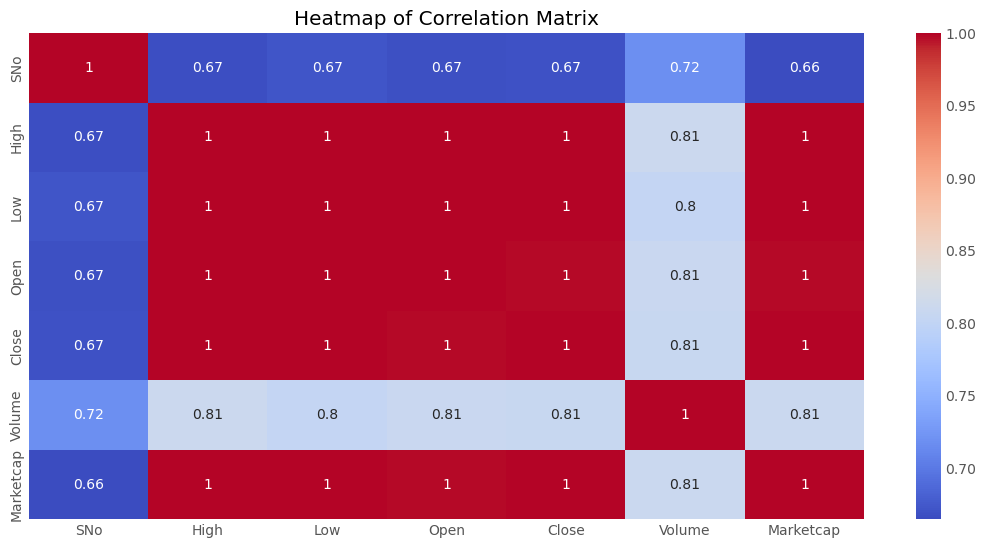

In [43]:
# Heatmap (using the correlation matrix)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

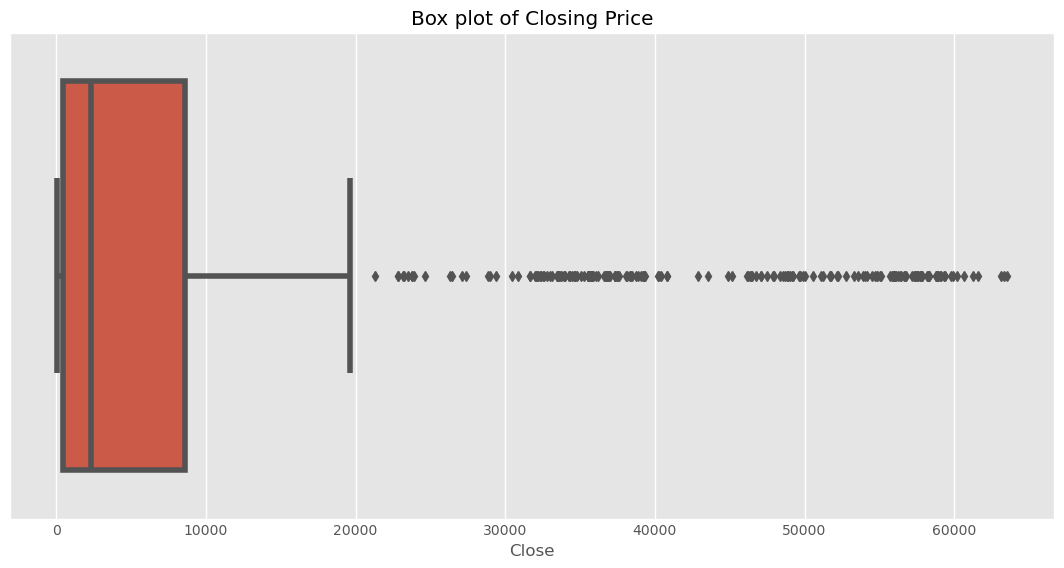

In [44]:
# Box plot
sns.boxplot(x='Close', data=df)
plt.title('Box plot of Closing Price')
plt.show()

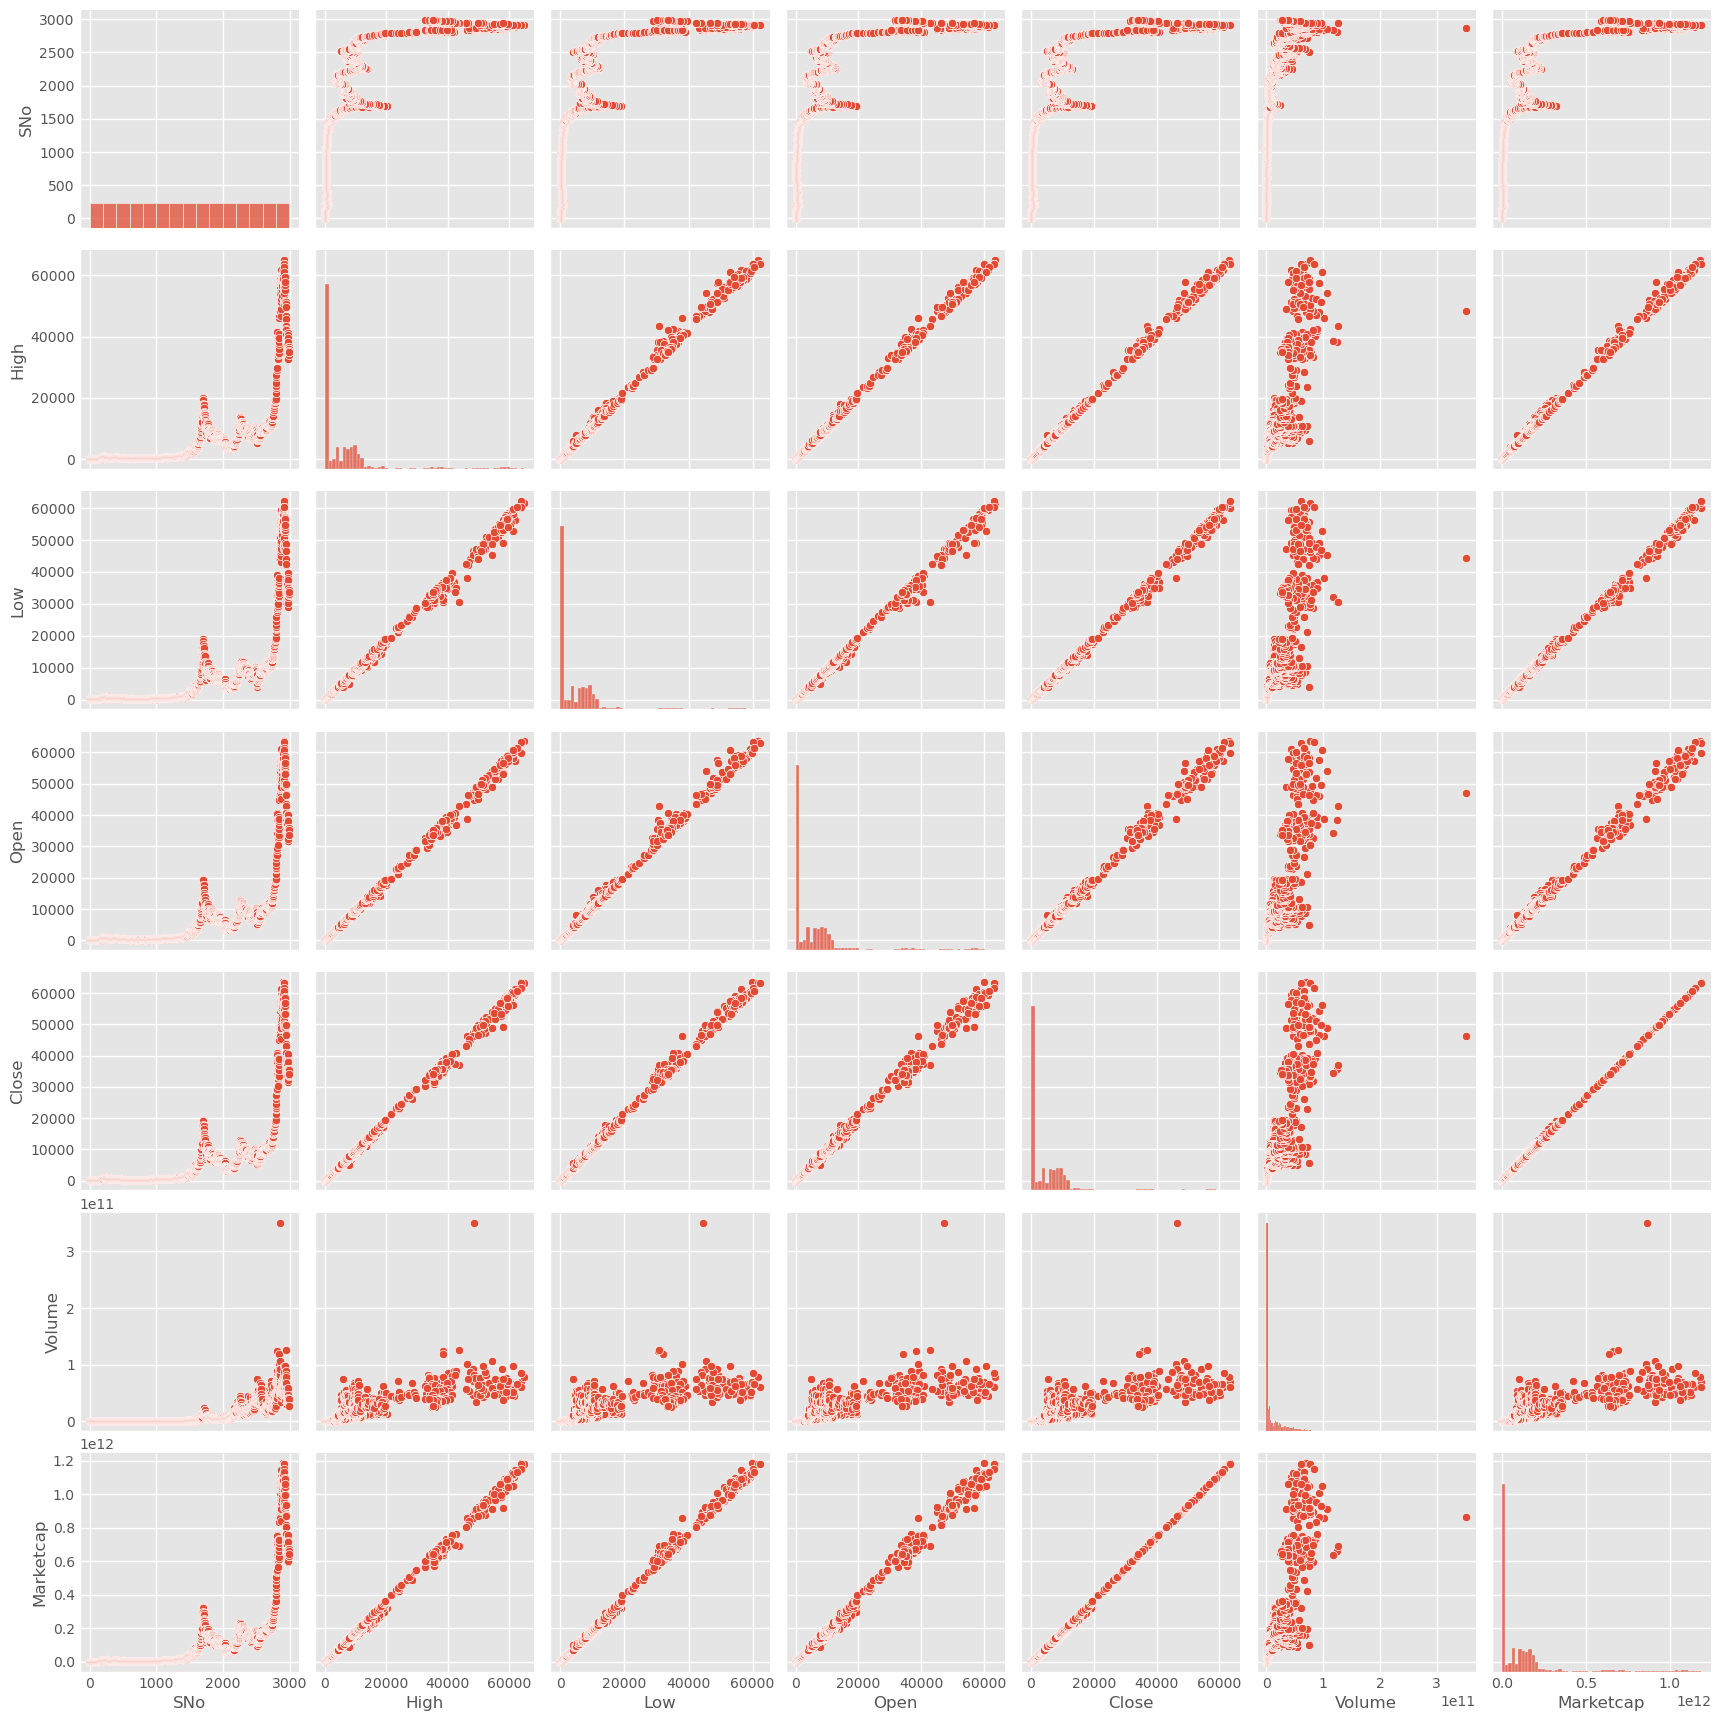

In [45]:
# Pair plot
sns.pairplot(df)
plt.show()

In [48]:
# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']])

In [49]:
# Mean
print("Mean:\n", df.mean())

Mean:
 SNo          1.496000e+03
High         6.893326e+03
Low          6.486010e+03
Open         6.700146e+03
Close        6.711290e+03
Volume       1.090633e+10
Marketcap    1.208761e+11
dtype: float64


C:\Users\islam\AppData\Local\Temp\ipykernel_26080\278517595.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print("Mean:\n", df.mean())
C:\Users\islam\AppData\Local\Temp\ipykernel_26080\278517595.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Mean:\n", df.mean())


In [50]:
# Variance
print("Variance:\n", df.var())

Variance:
 SNo          7.457560e+05
High         1.355555e+08
Low          1.181359e+08
Open         1.274199e+08
Close        1.276480e+08
Volume       3.567925e+20
Marketcap    4.449730e+22
dtype: float64


C:\Users\islam\AppData\Local\Temp\ipykernel_26080\105685615.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Variance:\n", df.var())


In [51]:
# Covariance
print("Covariance:\n", df.cov())

Covariance:
                     SNo          High           Low          Open  \
SNo        7.457560e+05  6.706577e+06  6.303181e+06  6.517059e+06   
High       6.706577e+06  1.355555e+08  1.263997e+08  1.313515e+08   
Low        6.303181e+06  1.263997e+08  1.181359e+08  1.225558e+08   
Open       6.517059e+06  1.313515e+08  1.225558e+08  1.274199e+08   
Close      6.527349e+06  1.314657e+08  1.227128e+08  1.273612e+08   
Volume     1.171467e+13  1.782381e+14  1.648822e+14  1.723748e+14   
Marketcap  1.210875e+14  2.453760e+15  2.290627e+15  2.377291e+15   

                  Close        Volume     Marketcap  
SNo        6.527349e+06  1.171467e+13  1.210875e+14  
High       1.314657e+08  1.782381e+14  2.453760e+15  
Low        1.227128e+08  1.648822e+14  2.290627e+15  
Open       1.273612e+08  1.723748e+14  2.377291e+15  
Close      1.276480e+08  1.723047e+14  2.382581e+15  
Volume     1.723047e+14  3.567925e+20  3.224090e+21  
Marketcap  2.382581e+15  3.224090e+21  4.449730e+22  


C:\Users\islam\AppData\Local\Temp\ipykernel_26080\2165015867.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Covariance:\n", df.cov())


In [52]:
# Correlation
print("Correlation:\n", df.corr())

Correlation:
                 SNo      High       Low      Open     Close    Volume  \
SNo        1.000000  0.667028  0.671538  0.668551  0.669008  0.718164   
High       0.667028  1.000000  0.998841  0.999442  0.999417  0.810464   
Low        0.671538  0.998841  1.000000  0.998905  0.999291  0.803110   
Open       0.668551  0.999442  0.998905  1.000000  0.998646  0.808439   
Close      0.669008  0.999417  0.999291  0.998646  1.000000  0.807388   
Volume     0.718164  0.810464  0.803110  0.808439  0.807388  1.000000   
Marketcap  0.664713  0.999094  0.999072  0.998382  0.999709  0.809156   

           Marketcap  
SNo         0.664713  
High        0.999094  
Low         0.999072  
Open        0.998382  
Close       0.999709  
Volume      0.809156  
Marketcap   1.000000  


C:\Users\islam\AppData\Local\Temp\ipykernel_26080\3784651184.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Correlation:\n", df.corr())


In [ ]:
#LDA with PCA

In [55]:
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(scaled_df)